In [1]:
# Reading Images
import numpy as np
import os, cv2
import re, random
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array

# Building Model
import tensorflow.keras as k
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB7, EfficientNetV2M, ResNet50, MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


2025-03-30 21:20:39.268695: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-30 21:20:39.268837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-30 21:20:39.410912: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load Dataset
path = r'/kaggle/input/fruit-and-vegetable-disease-healthy-vs-rotten/Fruit And Vegetable Diseases Dataset'
columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten','Bellpepper__Healthy', 'Bellpepper__Rotten', 'Carrot__Healthy','Carrot__Rotten','Cucumber__Healthy','Cucumber__Rotten','Grape__Healthy','Grape__Rotten','Guava__Healthy','Guava__Rotten','Jujube__Healthy','Jujube__Rotten','Mango__Healthy','Mango__Rotten','Orange__Healthy','Orange__Rotten','Pomegranate__Healthy','Pomegranate__Rotten','Potato__Healthy','Potato__Rotten','Strawberry__Healthy','Strawberry__Rotten','Tomato__Healthy','Tomato__Rotten']

images = []
labels = []

count = 0
for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(os.path.join(path, folder)):
        img_path = os.path.join(path, folder, img)
        image_data = cv2.imread(img_path)
        image_data = cv2.resize(image_data, (128, 128))
        images.append(image_data)
        # Assign binary labels: 0 for Healthy, 1 for Rotten
        labels.append(0 if 'Healthy' in folder else 1)

Loading -->  Apple__Healthy
Loading -->  Apple__Rotten


libpng warning: iCCP: known incorrect sRGB profile


Loading -->  Banana__Healthy
Loading -->  Banana__Rotten
Loading -->  Bellpepper__Healthy
Loading -->  Bellpepper__Rotten
Loading -->  Carrot__Healthy
Loading -->  Carrot__Rotten
Loading -->  Cucumber__Healthy


libpng warning: iCCP: known incorrect sRGB profile


Loading -->  Cucumber__Rotten
Loading -->  Grape__Healthy
Loading -->  Grape__Rotten
Loading -->  Guava__Healthy
Loading -->  Guava__Rotten
Loading -->  Jujube__Healthy
Loading -->  Jujube__Rotten
Loading -->  Mango__Healthy
Loading -->  Mango__Rotten
Loading -->  Orange__Healthy
Loading -->  Orange__Rotten
Loading -->  Pomegranate__Healthy
Loading -->  Pomegranate__Rotten
Loading -->  Potato__Healthy
Loading -->  Potato__Rotten
Loading -->  Strawberry__Healthy
Loading -->  Strawberry__Rotten
Loading -->  Tomato__Healthy


libpng warning: iCCP: known incorrect sRGB profile


Loading -->  Tomato__Rotten


In [3]:
# Convert to NumPy arrays
data = np.array(images).astype('float32') / 255.0  # Normalize
labels = np.array(labels)

# Shuffle data
data, labels = shuffle(data, labels, random_state=42)

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42)

In [4]:
model = Sequential()

# Convolutional Layers
model.add(Conv2D(32, (3,3), padding="same", input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

# Binary Classification (Fresh vs Rotten)
model.add(Dense(1, activation="sigmoid"))  # Sigmoid for binary classification

# Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train Model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/10
  5/733 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.5302 - loss: 6.0417 

I0000 00:00:1743370127.428035     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1743370127.444670     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


733/733 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6454 - loss: 1.2912

W0000 00:00:1743370151.081553     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1743370154.810072     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


733/733 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.6455 - loss: 1.2904 - val_accuracy: 0.7808 - val_loss: 0.4438
Epoch 2/10
  7/733 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.8740 - loss: 0.3165

W0000 00:00:1743370156.848334     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


733/733 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.8277 - loss: 0.3971 - val_accuracy: 0.8109 - val_loss: 0.3950
Epoch 3/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8520 - loss: 0.3415 - val_accuracy: 0.8648 - val_loss: 0.3218
Epoch 4/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8663 - loss: 0.3048 - val_accuracy: 0.8669 - val_loss: 0.3285
Epoch 5/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.8857 - loss: 0.2631 - val_accuracy: 0.8510 - val_loss: 0.3451
Epoch 6/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.8968 - loss: 0.2500 - val_accuracy: 0.7694 - val_loss: 0.5572
Epoch 7/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9054 - loss: 0.2292 - val_accuracy: 0.8995 - val_loss: 0.2450
Epoch 8/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9176 - loss: 0.2024 - val_accuracy: 0.8305 - val_loss: 0.3415
Epoch 9/10
733/733 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9199 - loss: 0.1881 - val_accurac

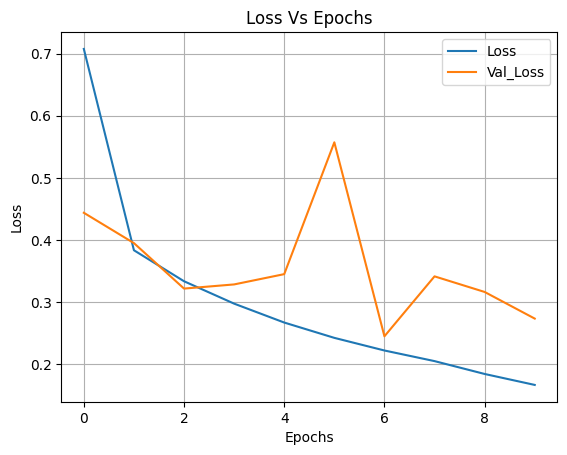

In [6]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

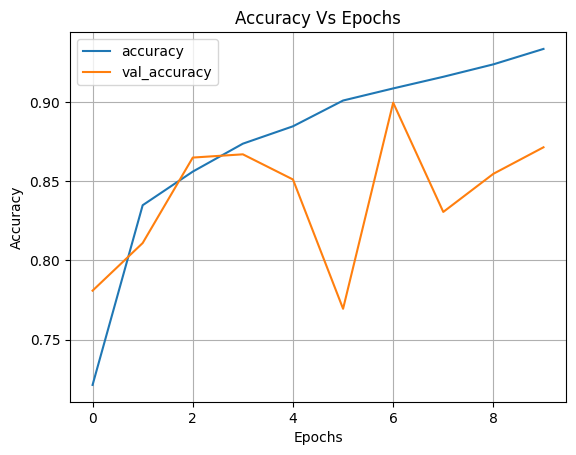

In [7]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


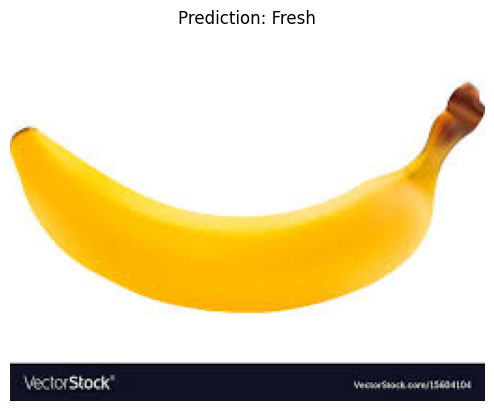

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


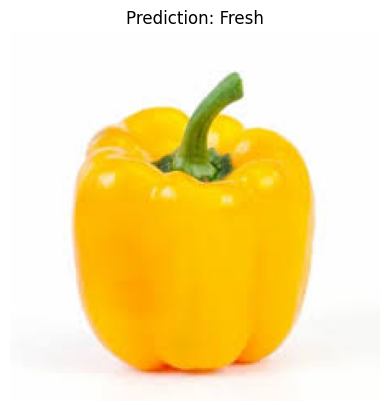

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


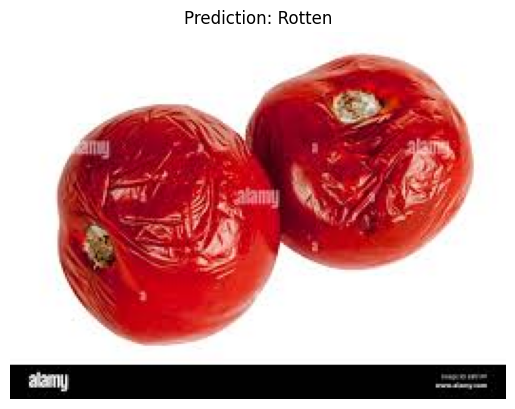

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


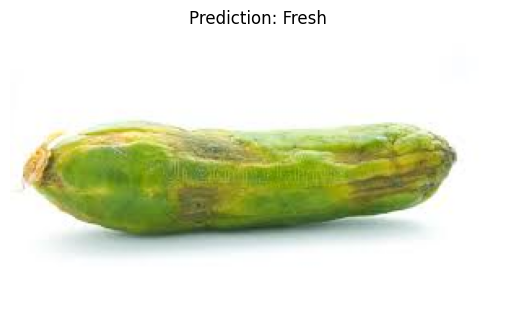

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


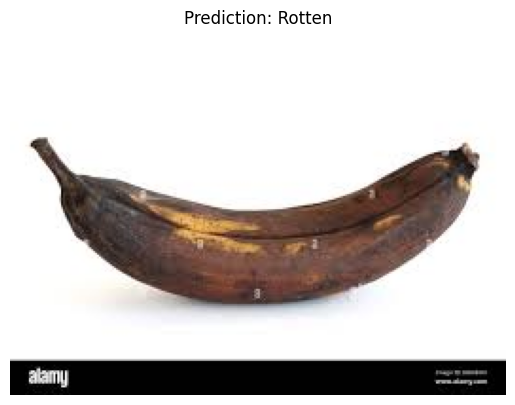

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


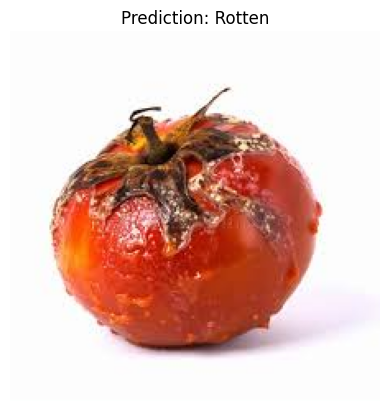

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


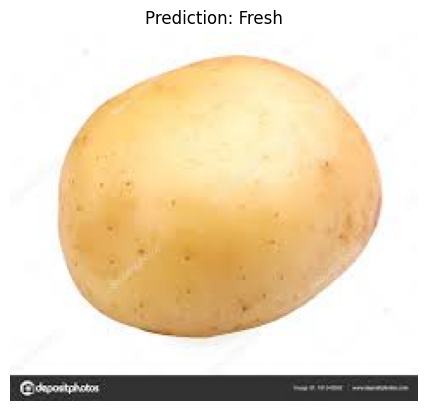

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


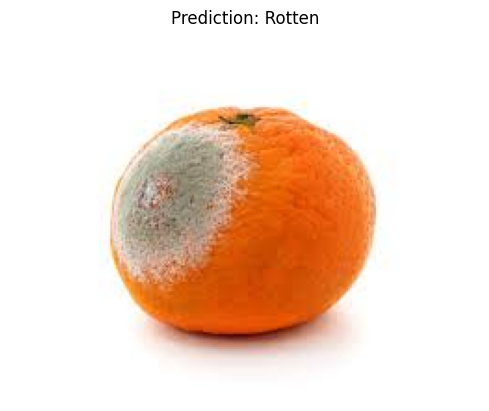

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


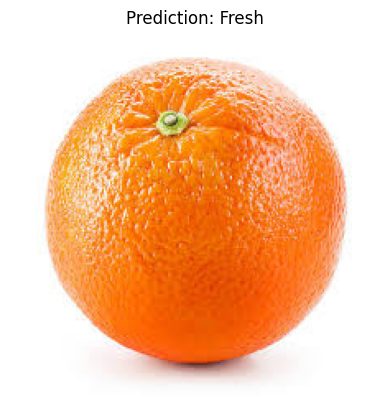

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


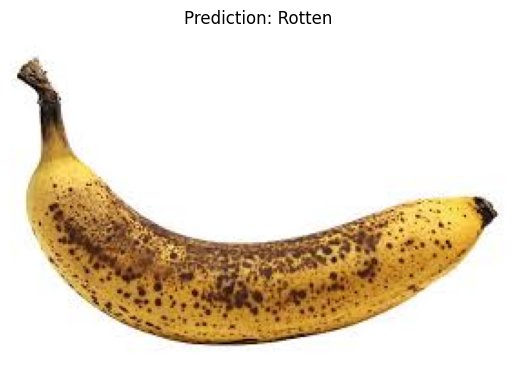

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


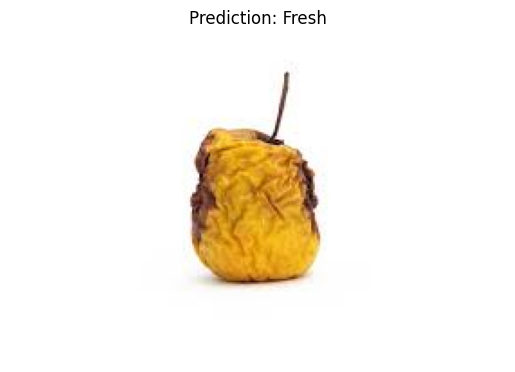

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


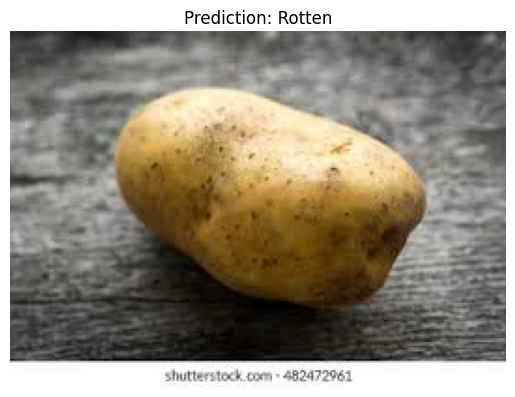

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


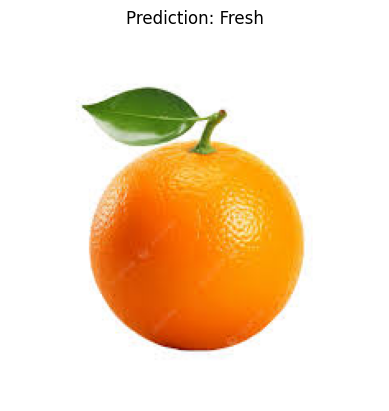

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


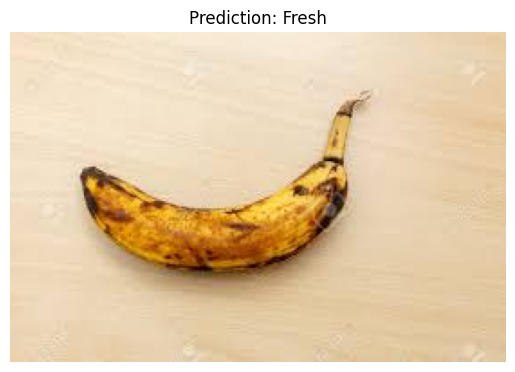

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


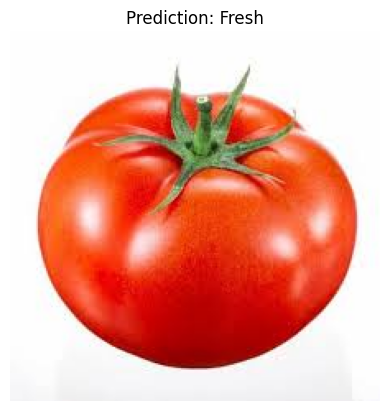

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


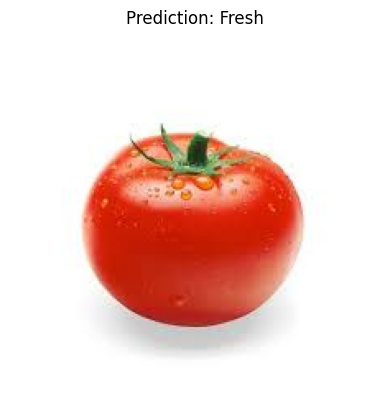

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


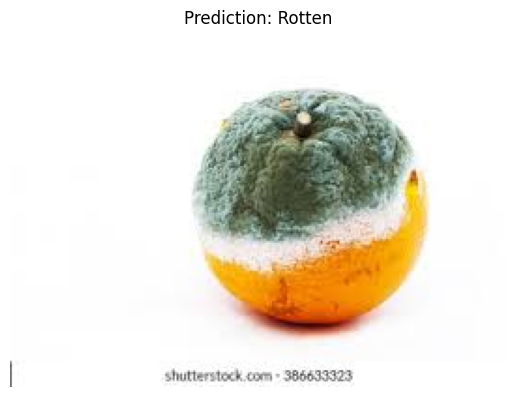

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


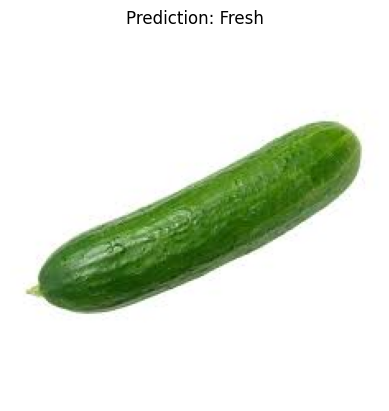

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


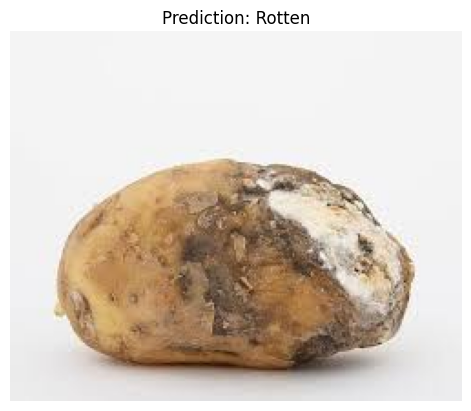

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


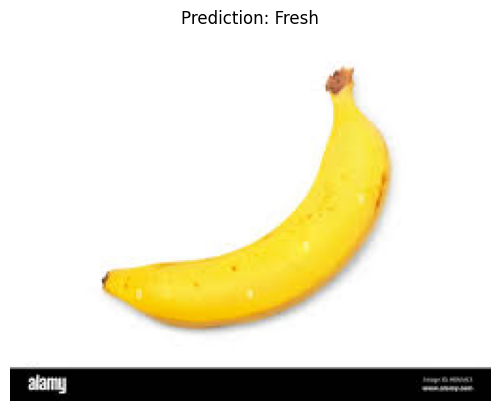

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


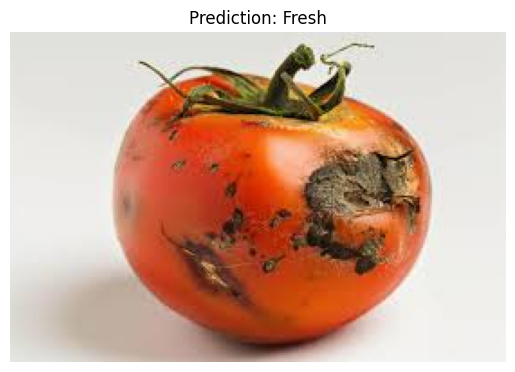

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


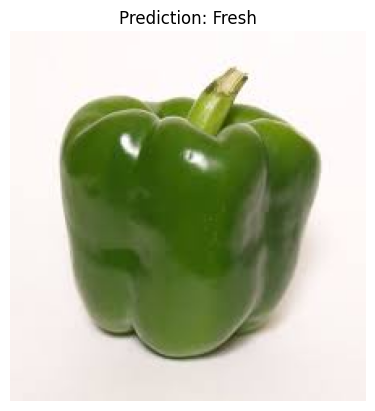

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


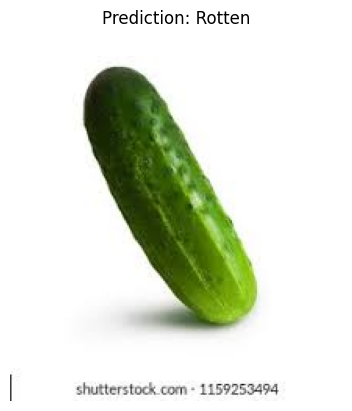

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


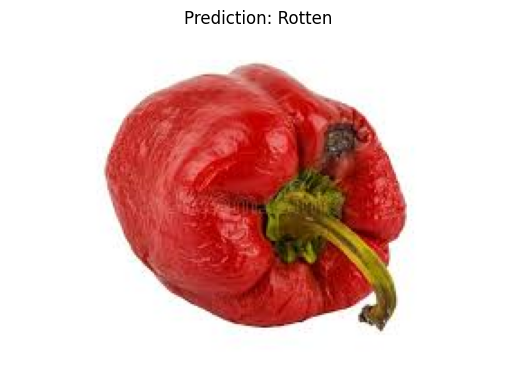

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


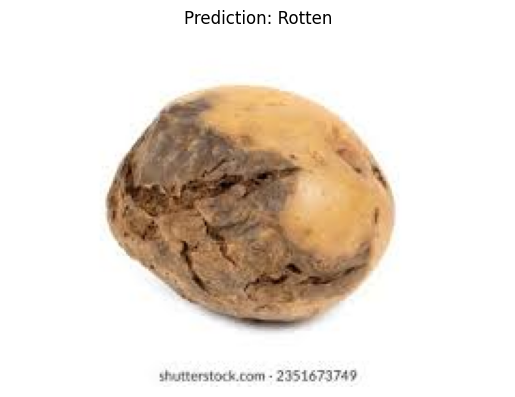

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


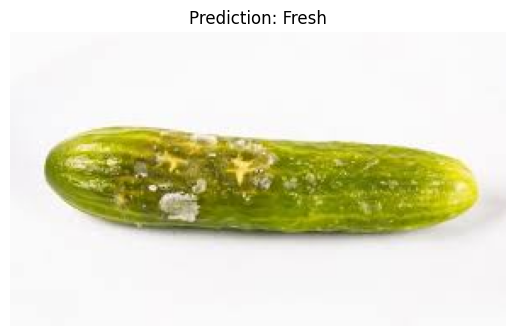

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


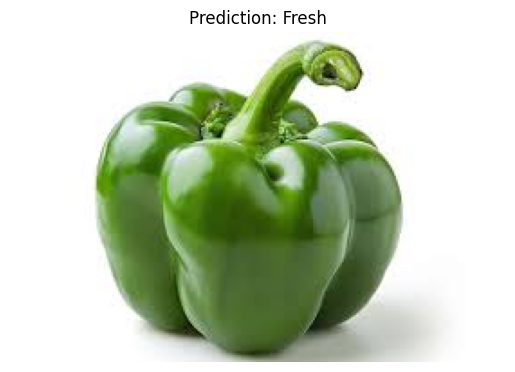

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


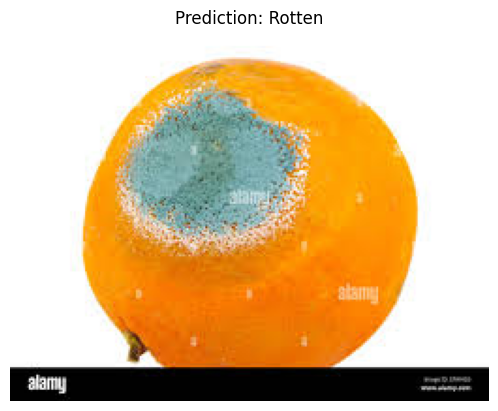

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


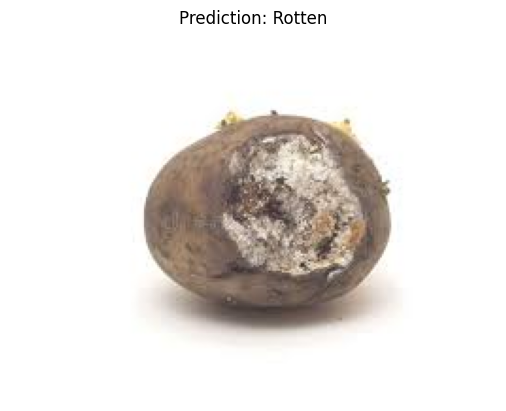

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


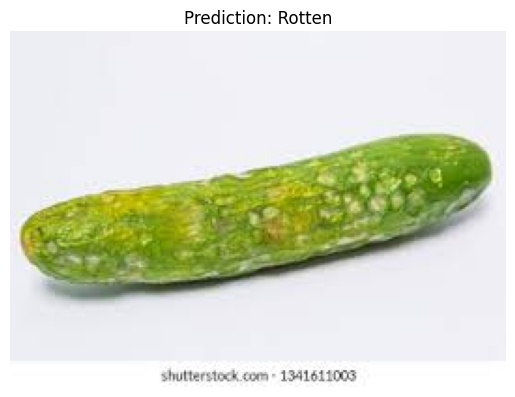

In [13]:
def classify_images_in_folder(model, folder_path):
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        img = img.astype('float32') / 255.0  # Normalize
        img = np.expand_dims(img, axis=0)  # Expand dimensions

        prediction = model.predict(img)[0][0]  # Get prediction
        label = "Fresh" if prediction < 0.5 else "Rotten"

        plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"Prediction: {label}")
        plt.show()

# Example usage
test_folder_path = "/kaggle/input/moti-file/"  # Change this to your folder path
classify_images_in_folder(model, test_folder_path)


In [14]:
model.save("fresh_rotten_model.h5")
print("Model saved successfully.")

Model saved successfully.
